## CSV to geodf

In [1]:
# Import libraries

import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Display all columns when looking at dfs
pd.set_option('display.max.columns', None)

# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

power_plants = power_plants.drop(columns = 'Unnamed: 0')

power_plants.head()


,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


Lets use the lat and long columns in the CSV to create dfs
These indicate the location of the power plants in the NAD83 CRS (EPSG: 4269)

We can use the `geopandas` function `points_from_xy()`

In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

<Axes: >

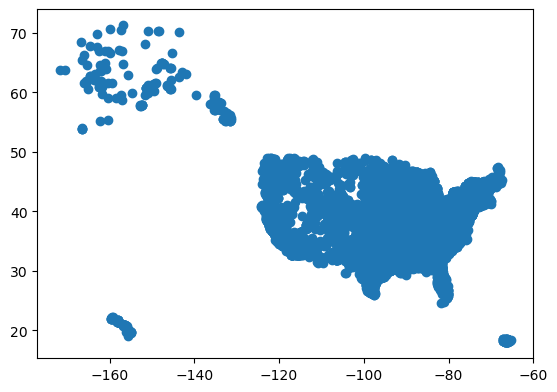

In [4]:
power_plants.plot()

# f-strings

So far we hav eprinted variables using the string concatenation inside the `print` function:
(aka we use commas to separate every variable and string that we want to print.

Ex.

In [5]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way to mix variables and strings in a print statement is creating a **f-string**, stands for "formatted string".

The simplest sintax is the following:

    ```python
    f"some text {replace}"
    
Replace is where you put your variable, na expression, a function or method call.


In [6]:
# Check what is the ellipsoid:
f"ellipsoid: {power_plants.crs.ellipsoid}"


'ellipsoid: GRS 1980'

In [7]:
# Use f-strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


Advantages of using f-strings: a lot of customization for formatting output. 

In [8]:
# Set the label width to 25 characters, aliging the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS geographic?:   False


Import Shapefile

In [9]:
os.getcwd()

'/Users/npepper/meds/eds-220/eds220-2024-in-class'

In [10]:
# Need to reconstruct the file path to root directory to access branch with course details

# Create absolute file path to data
fp = os.path.join('/',
                  'courses',
                  'EDS220',
                  'data',
                  'tl_2022_us_state',
                  'tl_2022_us_state.shp')

states = gpd.read_file(fp)
states.columns = states.columns.str.lower()



ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [11]:
print(states.crs)

EPSG:4269


<Axes: >

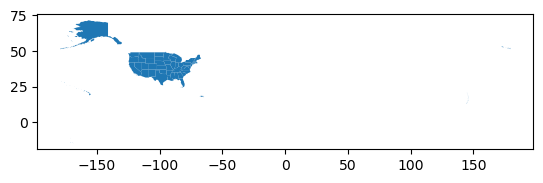

In [12]:
states.plot()

`for` loops

update the region division and state fp columns

In [13]:
 print(f"Region is string dtype? {is_string_dtype(states['region'])}")

Region is string dtype? True


In [14]:
code_cols = ['region', 'division', 'statefp']

for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


DRY = don't repeat yourself is a core programming principle that encourages reducing redundancy and consolidating repreated logic. If you need to repeat the "same" code more than twice you probably need a `for` loop

Next, Update data type of code columns to integers.
This time we will verify the dat typeo f the column using the `is.numeric_dtype()` and `assert` statements:

In [15]:
# Update code columns into integers

for column in code_cols:
    states[column] = states[column].astype('int') # Update data type
    assert is_numeric_dtype(states[column]) # Check conversion was successful

The `assert` keyword does nothing if the expression next to it evaluates to `True`. 
If the expression evaluates to `False` then `assert` raises an `AssertationError` and stops your code form running.

*This is a good way to test that code is doing what you want (rather than print) less prone to error*

Example:


In [16]:
# Assert does nothing if statement is true
assert 2 + 2 == 4

## Data selection

For this lession, we want to use only the contiguous states. 

# Check in:

- What are the unique values for region, divsion, or state codes in the data?
- What code should we select to keep only states in the contiguous US?

In [17]:
states.region.unique()

array([3, 2, 1, 4, 9])

Hawaii and Alaska have codes 2, 15, and then region 9 should also be excluded 

In [18]:
# Select contiguous US states
contiguous = states[ (states.region!=9) & (~states.statefp.isin([2,15]))]

<Axes: >

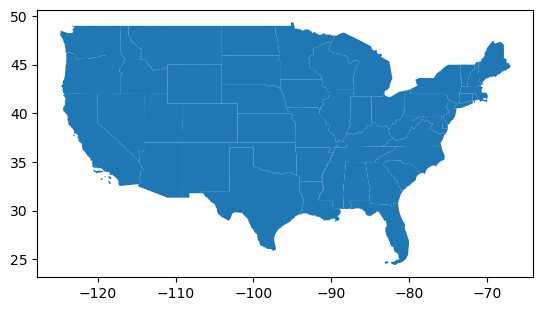

In [19]:
contiguous.plot()

The `~` tilde symbol is used in Python to negate a statement

Select data in power plants data frame for the contiguous US states

In [20]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

## Plotting 

Before we plot our data, lets make sure they are in the same CRS:

In [21]:
contiguous.crs == power_plants.crs

True

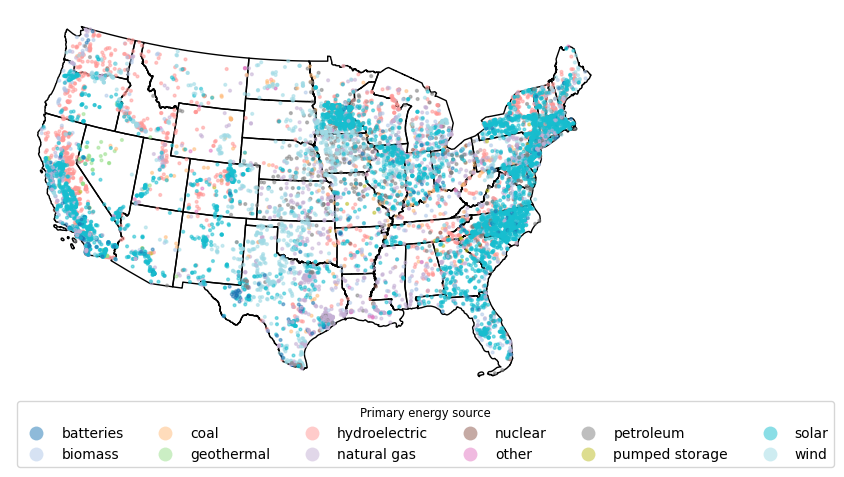

In [24]:
contiguous = contiguous.to_crs(epsg=5070)
power_plants = power_plants.to_crs(epsg=5070)

fig, ax = plt.subplots(figsize=(9,5))

# Remove axis for a cleaner map

ax.axis('off')

# Add states
contiguous.plot(ax=ax,
                color = 'none',
                edgecolor='black')

# Add the electric power plant color by energy source
power_plants.plot(ax=ax,
                column='primsource',
                legend=True,
                markersize = 4,
                cmap='tab20',
                alpha=0.5,
                legend_kwds={
                    'title':'Primary energy source',
                    'title_fontsize': 'small',
                    'ncol':6,
                    'loc':'upper left',
                    'bbox_to_anchor':(0,0)
                }
)

plt.show()

We controlled the legend location using 'loc' and 'bbox_to_anchor' in the 'legend_kwds'

-`loc` indicates **the corner of the legend that we want to use for placement**
-`bbox_to_anchor` is a tuple with coordinates indicating wher et o place the corner specified